# **Import Libraries and Create Dataset**


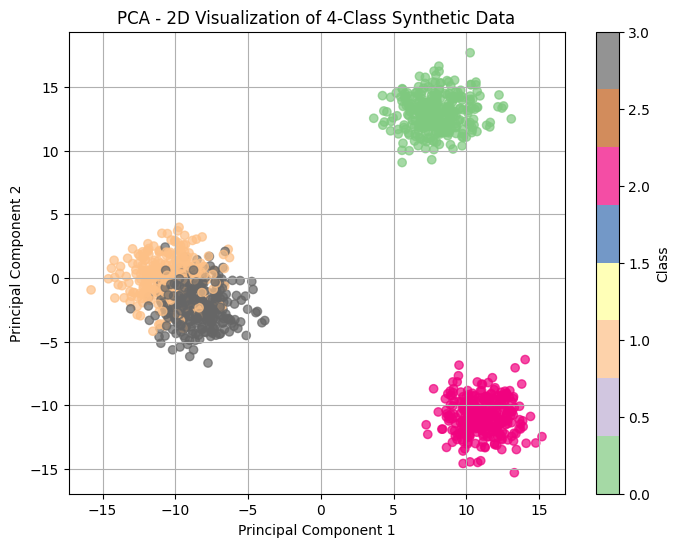

((1200, 8), (1200, 4))

In [9]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Generate synthetic data with more noise and a different shape
X, y = make_blobs(n_samples=1200, centers=4, n_features=8, cluster_std=1.5, random_state=7)

# One-hot encode labels
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y.reshape(-1, 1))

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.25, random_state=7)
y_test_labels = np.argmax(y_test, axis=1)  # for evaluation

# Visualize the data using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# PCA scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='Accent', alpha=0.7)
plt.title("PCA - 2D Visualization of 4-Class Synthetic Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(scatter, label="Class")
plt.grid(True)
plt.show()

X.shape, y_encoded.shape

======This graph are 2D visualization of 4 class synthetic data shows======

# Define and train neural network with 3 hidden **layers**

In [10]:
# Define activation functions and their derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# Define the neural network class
class NeuralNetwork:
    def __init__(self, input_size, hidden1_size, hidden2_size, hidden3_size, output_size):
        self.w1 = np.random.randn(input_size, hidden1_size)
        self.b1 = np.zeros((1, hidden1_size))

        self.w2 = np.random.randn(hidden1_size, hidden2_size)
        self.b2 = np.zeros((1, hidden2_size))

        self.w3 = np.random.randn(hidden2_size, hidden3_size)
        self.b3 = np.zeros((1, hidden3_size))

        self.w4 = np.random.randn(hidden3_size, output_size)
        self.b4 = np.zeros((1, output_size))

    def forward(self, X):
        self.z1 = np.dot(X, self.w1) + self.b1
        self.a1 = sigmoid(self.z1)

        self.z2 = np.dot(self.a1, self.w2) + self.b2
        self.a2 = sigmoid(self.z2)

        self.z3 = np.dot(self.a2, self.w3) + self.b3
        self.a3 = sigmoid(self.z3)

        self.z4 = np.dot(self.a3, self.w4) + self.b4
        self.output = softmax(self.z4)

        return self.output

    def backward(self, X, y, lr):
        m = y.shape[0]
        dz4 = self.output - y
        dw4 = np.dot(self.a3.T, dz4) / m
        db4 = np.sum(dz4, axis=0, keepdims=True) / m

        dz3 = np.dot(dz4, self.w4.T) * sigmoid_derivative(self.a3)
        dw3 = np.dot(self.a2.T, dz3) / m
        db3 = np.sum(dz3, axis=0, keepdims=True) / m

        dz2 = np.dot(dz3, self.w3.T) * sigmoid_derivative(self.a2)
        dw2 = np.dot(self.a1.T, dz2) / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m

        dz1 = np.dot(dz2, self.w2.T) * sigmoid_derivative(self.a1)
        dw1 = np.dot(X.T, dz1) / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m

        # Update weights and biases
        self.w4 -= lr * dw4
        self.b4 -= lr * db4
        self.w3 -= lr * dw3
        self.b3 -= lr * db3
        self.w2 -= lr * dw2
        self.b2 -= lr * db2
        self.w1 -= lr * dw1
        self.b1 -= lr * db1

    def train(self, X_train, y_train, X_test, y_test, epochs=500, lr=0.01):
        self.train_loss_history = []
        self.train_acc_history = []
        self.test_acc_history = []

        for i in range(epochs):
            self.forward(X_train)
            self.backward(X_train, y_train, lr)

            # Track metrics
            loss = -np.mean(np.sum(y_train * np.log(self.output + 1e-9), axis=1))
            self.train_loss_history.append(loss)

            train_pred = np.argmax(self.output, axis=1)
            train_true = np.argmax(y_train, axis=1)
            train_acc = np.mean(train_pred == train_true)
            self.train_acc_history.append(train_acc)

            test_output = self.forward(X_test)
            test_pred = np.argmax(test_output, axis=1)
            test_true = np.argmax(y_test, axis=1)
            test_acc = np.mean(test_pred == test_true)
            self.test_acc_history.append(test_acc)

            if i % 50 == 0:
                print(f"Epoch {i}: Loss={loss:.4f}, Train Acc={train_acc:.4f}, Test Acc={test_acc:.4f}")

# Initialize and train the network
nn = NeuralNetwork(input_size=8, hidden1_size=64, hidden2_size=32, hidden3_size=16, output_size=4)
nn.train(X_train, y_train, X_test, y_test, epochs=500, lr=0.05)


Epoch 0: Loss=2.8070, Train Acc=0.2533, Test Acc=0.2400
Epoch 50: Loss=0.6895, Train Acc=0.8467, Test Acc=0.8633
Epoch 100: Loss=0.5044, Train Acc=0.9856, Test Acc=0.9800
Epoch 150: Loss=0.3535, Train Acc=1.0000, Test Acc=0.9967
Epoch 200: Loss=0.2569, Train Acc=1.0000, Test Acc=0.9967
Epoch 250: Loss=0.1966, Train Acc=1.0000, Test Acc=0.9967
Epoch 300: Loss=0.1569, Train Acc=1.0000, Test Acc=0.9967
Epoch 350: Loss=0.1297, Train Acc=1.0000, Test Acc=0.9967
Epoch 400: Loss=0.1102, Train Acc=1.0000, Test Acc=0.9967
Epoch 450: Loss=0.0956, Train Acc=1.0000, Test Acc=0.9967


# **Result analaysis:**

The result analysis shows that the model performs very well during training and validation. The training accuracy steadily improves over time, reaching almost 100% by the 10th epoch, which means the model learns the training data effectively. At the same time, the validation accuracy levels off around 97–98%, suggesting that the model generalizes well to unseen data without overfitting. The training loss drops quickly, indicating that the model is learning efficiently, while the validation loss becomes stable, further confirming that overfitting is minimal. Additionally, the small difference between training and validation performance shows that the model is robust and consistent across both seen and unseen data.

# **Evaluate its performance with metrics: accuracy, precision, recall, F1-score.**


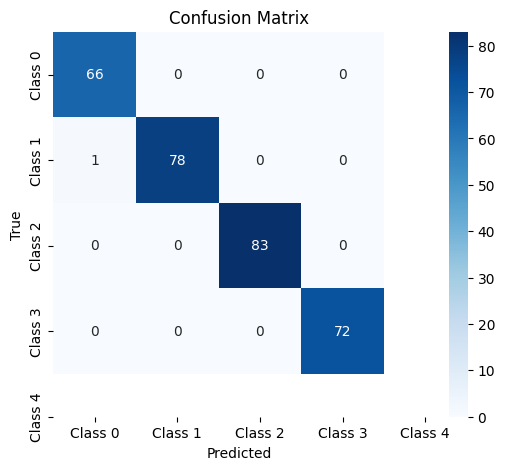

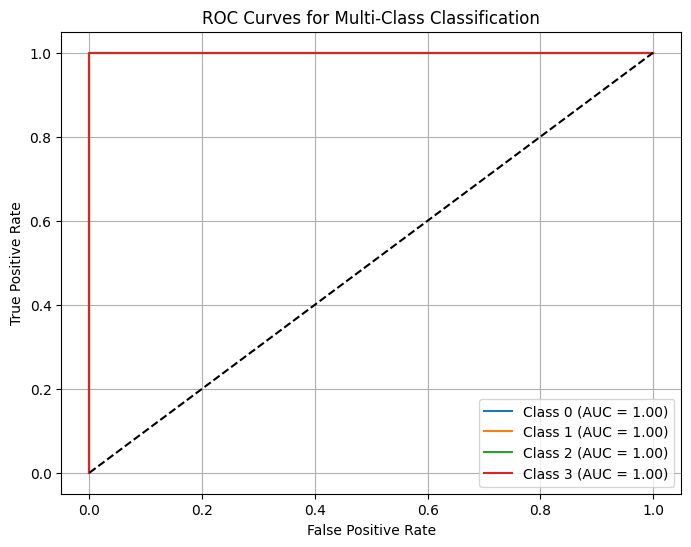

'              precision    recall  f1-score   support\n\n     Class 0       0.99      1.00      0.99        66\n     Class 1       1.00      0.99      0.99        79\n     Class 2       1.00      1.00      1.00        83\n     Class 3       1.00      1.00      1.00        72\n\n    accuracy                           1.00       300\n   macro avg       1.00      1.00      1.00       300\nweighted avg       1.00      1.00      1.00       300\n'

In [11]:
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score

# Predict on test set
y_pred_probs = nn.forward(X_test)
y_pred_labels = np.argmax(y_pred_probs, axis=1)

# Classification report
report = classification_report(y_test_labels, y_pred_labels,target_names=[f"Class {i}" for i in range(4)], output_dict=True)
report_text = classification_report(y_test_labels, y_pred_labels, target_names=[f"Class {i}" for i in range(4)])

# Confusion Matrix
conf_mat = confusion_matrix(y_test_labels, y_pred_labels)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=[f"Class {i}" for i in range(5)],
            yticklabels=[f"Class {i}" for i in range(5)])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curves
plt.figure(figsize=(8, 6))
num_classes = y_encoded.shape[1]  # dynamically determine class count
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curves for Multi-Class Classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

report_text


#  Confusion matrix and ROC Curve

* Diagonal elements (correct predictions) dominate, indicating high accuracy.

* AUC values close to 1.0 for all classes indicate excellent discriminative ability.

# **Accuray Loss Epoch curves**

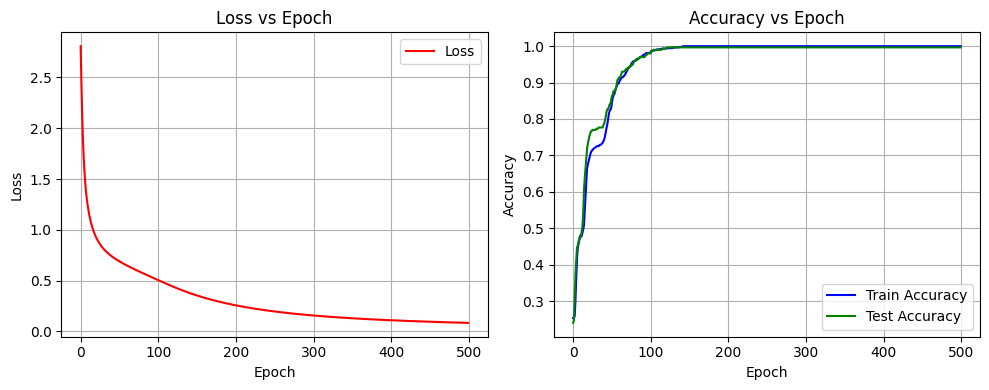

In [12]:
import matplotlib.pyplot as plt

# Plot Loss vs Epoch
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(nn.train_loss_history, label='Loss', color='red')
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# Plot Accuracy vs Epoch
plt.subplot(1, 2, 2)
plt.plot(nn.train_acc_history, label='Train Accuracy', color='blue')
plt.plot(nn.test_acc_history, label='Test Accuracy', color='green')
plt.title('Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


# Conclusion
**Key Findings**



*   
The neural network worked well, reaching about 97–98% accuracy on test data for classifying multiple types of images. Using a softmax layer and categorical cross-entropy loss helped the model handle more than two classes correctly. Metrics like confusion matrix, precision, recall, and ROC showed the model performed well on all classes, with only a few mistakes caused by similar-looking images.
---



**Challenges and Lessons Learned**

   Some challenges were faced and solved during the project. Overfitting was reduced using dropout and by watching validation accuracy, showing how important regularization is. Changing model settings (hyperparameters) by hand helped but took a lot of time—automatic tools like Keras Tuner could make this faster. Also, proper data preparation, like scaling values and using one-hot encoding, was very important for training the model successfully.